10. Train a deep MLP on the MNIST dataset (you can load it using
keras.datasets.mnist.load_data(). See if you can get over 98%
precision. Try searching for the optimal learning rate by using the
approach presented in this chapter (i.e., by growing the learning rate
exponentially, plotting the error, and finding the point where the error
shoots up). Try adding all the bells and whistles—save checkpoints, use
early stopping, and plot learning curves using TensorBoard.

In [19]:
# Load data
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("insurance.csv")

num_attribs = ["age", "bmi", "children", "charges"]
cat_attribs = ["sex"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

insurance = full_pipeline.fit_transform(df)
labels = np.array([1 if x == "yes" else 0 for x in df["smoker"]])

print(insurance.shape)
print(labels.shape)

(1338, 6)
(1338,)


In [21]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(insurance, labels, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size = 0.25)
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train))

(802, 6)
(802,)
[0 1]


In [38]:
# Discover learning rate

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

model = keras.models.Sequential([
    keras.layers.Dense(6, input_shape=(6,), activation='relu'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-8),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=300, callbacks=[lr_scheduler])

Epoch 1/300
26/26 [==============================] - 1s 7ms/step - loss: 0.6965 - accuracy: 0.5299 - val_loss: 0.6875 - val_accuracy: 0.5970 - lr: 1.0000e-08
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5299 - val_loss: 0.6875 - val_accuracy: 0.5970 - lr: 1.1220e-08
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5299 - val_loss: 0.6875 - val_accuracy: 0.5970 - lr: 1.2589e-08
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5299 - val_loss: 0.6875 - val_accuracy: 0.5970 - lr: 1.4125e-08
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5299 - val_loss: 0.6875 - val_accuracy: 0.5970 - lr: 1.5849e-08
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5299 - val_loss: 0.6875 - val_accuracy: 0.5970 - lr: 1.7783e-08
Epoch 7/300
26/26 [==============================] -

(1e-08, 0.1, 0.0, 0.3)

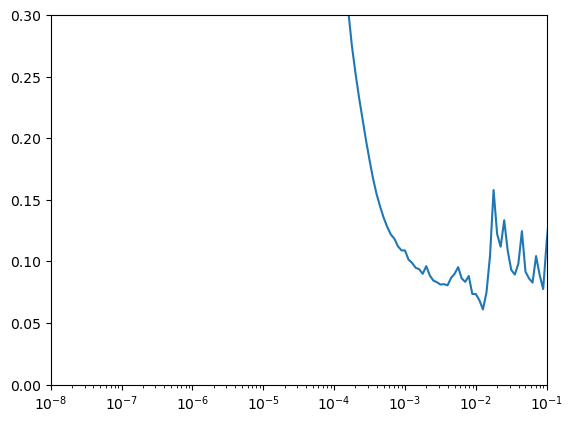

In [39]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-1, 0, 0.3])

In [40]:
# The best lr is approximately between 1e-3 and 1e-2

model = keras.models.Sequential([
    keras.layers.Dense(6, input_shape=(6,), activation='relu'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=300)

Epoch 1/300
26/26 [==============================] - 1s 7ms/step - loss: 0.3554 - accuracy: 0.8429 - val_loss: 0.2196 - val_accuracy: 0.8918
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9352 - val_loss: 0.1094 - val_accuracy: 0.9366
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1082 - accuracy: 0.9501 - val_loss: 0.1233 - val_accuracy: 0.9478
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9526 - val_loss: 0.0976 - val_accuracy: 0.9552
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9601 - val_loss: 0.1078 - val_accuracy: 0.9328
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 0.9589 - val_loss: 0.0893 - val_accuracy: 0.9515
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9626 - val_loss: 0.0903 - val_accuracy: 0.9590
Epoch 8/300
2

In [41]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=30)
checkpoint_cb = keras.callbacks.ModelCheckpoint("lab9_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=300, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/300
26/26 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.1499 - val_accuracy: 0.9701
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9975 - val_loss: 0.1656 - val_accuracy: 0.9701
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9988 - val_loss: 0.1547 - val_accuracy: 0.9701
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.1671 - val_accuracy: 0.9701
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.1634 - val_accuracy: 0.9701
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.1620 - val_accuracy: 0.9701
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.1676 - val_accuracy: 0.9701
Epoch 8/300
2

In [42]:
model = keras.models.load_model("lab9_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.1244 - accuracy: 0.9776


[0.12441874295473099, 0.9776119589805603]